In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('./')
import json
import os
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum
import matplotlib.pyplot as plt
import math
from dataclasses import dataclass
from component.sup_sys.algorithm_loader import load_algorithms
from component.a_backend.fake_backend import *
from component.sup_sys.backend_loader import load_backends
from qiskit.visualization import plot_error_map

@dataclass
class ResultOfSchedule:
    numcircuit: int
    nameAlgorithm: str
    averageQubits: float
    nameSchedule: str
    typeMachine: dict
    
    # Metrics
    average_turnaroundTime: float
    average_responseTime: float
    average_fidelity: float
    sampling_overhead: float
    average_throughput: float
    average_utilization: float
    scheduler_latency: float
    makespan: float
    
result_Schedule = ResultOfSchedule(
    numcircuit=0,
    nameAlgorithm="",
    averageQubits=0.0,
    nameSchedule="",
    typeMachine={},
    
    # Metrics
    average_turnaroundTime=0.0,
    average_responseTime=0.0,
    average_fidelity=0.0,
    sampling_overhead=0.0,
    average_throughput=0.0,
    average_utilization=0.0,
    scheduler_latency=0.0,
    makespan=0.0
)
load_algorithms()
result_Schedule.nameSchedule = "NoTaDS"

backendlist = load_backends()
print(len(backendlist))
print(backendlist)

machines = {}
backend0 = FakeBelemV2()
backend1 = FakeManilaV2()

machines[backend0.name] = backend0
machines[backend1.name] = backend1
print(machines)
# plot_error_map(list(machines.values())[0], figsize=(10, 8))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
58
{'FakeAlgiers': 27, 'FakeAlmadenV2': 20, 'FakeArmonkV2': 1, 'FakeAthensV2': 5, 'FakeAuckland': 27, 'FakeBelemV2': 5, 'FakeBoeblingenV2': 20, 'FakeBogotaV2': 5, 'FakeBrisbane': 127, 'FakeBrooklynV2': 65, 'FakeBurlingtonV2': 5, 'FakeCairoV2': 27, 'FakeCambridgeV2': 28, 'FakeCasablancaV2': 7, 'FakeCusco': 127, 'FakeEssexV2': 5, 'FakeFractionalBackend': 5, 'FakeGeneva': 27, 'FakeGuadalupeV2': 16, 'FakeHanoiV2': 27, 'FakeJakartaV2': 7, 'FakeJohannesburgV2': 20, 'FakeKawasaki': 127, 'FakeKolkataV2': 27, 'FakeKyiv': 127, 'FakeKyoto': 127, 'FakeLagosV2': 7, 'FakeLimaV2': 5, 'FakeLondonV2': 5, 'FakeManhattanV2': 65, 'FakeManilaV2': 5, 'FakeMarrakesh': 156, 'FakeMelbourneV2': 15, 'FakeMontrealV2': 27, 'FakeMumbaiV2': 27, 'FakeNairobiV2': 7, 'FakeOsaka': 127, 'FakeOslo': 7, 'FakeOurenseV2': 5, 'FakeParisV2': 27, 'FakePeekskill': 27, 'FakePerth': 7, 'FakePoughkeepsieV2': 20, 'FakePrague': 33, 'FakeQuebec': 1

In [7]:
from component.b_benchmark.mqt_tool import benchmark_circuit, create_circuit
from component.sup_sys.job_info import JobInfo

# initialize the number of qubits and jobs
num_qubits_per_job = 2
num_jobs = 5
jobs = {}

for i in range(num_jobs):
    job_id = str(i + 1)
    jobs[job_id] = num_qubits_per_job

# update to result_Schedule
result_Schedule.numcircuit = len(jobs)
result_Schedule.averageQubits = sum(jobs.values()) / len(jobs)

# generate circuits and job information
origin_job_info = {}

for job_name, num_qubits in jobs.items():
    circuit = create_circuit(num_qubits, job_name)
    result_Schedule.nameAlgorithm = "ghz"
    circuit.remove_final_measurements()
    origin_job_info[job_name] = JobInfo(
        job_name=job_name,
        qubits=circuit.num_qubits,
        machine=None,  # Placeholder for machine name
        capacity_machine=0,  # Placeholder for machine capacity
        start_time=0.0,  # Placeholder for start time
        duration=0.0,  # Placeholder for duration
        end_time=0.0,  # Placeholder for end time
        childrenJobs=None,  # Placeholder for child jobs
        circuit=circuit,
        result_cut=None,  # Placeholder for result cut
    )

for job in origin_job_info.values():
    job.print()
    
process_job_info = origin_job_info.copy()

Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 2
Circuit:            ┌───┐
q2_0: ─────┤ X ├
      ┌───┐└─┬─┘
q2_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 3
Circuit:            ┌───┐
q3_0: ─────┤ X ├
      ┌───┐└─┬─┘
q3_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: No

In [11]:
# Create list obj for each job
from component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS import *
backendlist = list(machines.values())
Tau = [200]*len(backendlist)
print("Tau: ", Tau) 
print(backendlist)
obj_dict = {}
for job_name, job in process_job_info.items():
    obj_dict[job_name] = NoTODS(job.circuit, backendlist, Tau)

machine_capacity = {}
machine_capacity = {machine_name: machines[machine_name].num_qubits for machine_name in machines}
result_Schedule.typeMachine = machine_capacity
print(obj_dict)

Tau:  [200, 200]
[<qiskit_ibm_runtime.fake_provider.backends.belem.fake_belem.FakeBelemV2 object at 0x74f7fc33f8e0>, <qiskit_ibm_runtime.fake_provider.backends.manila.fake_manila.FakeManilaV2 object at 0x74f7fc103ac0>]
{'1': <component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS.NoTODS object at 0x74f77c33a050>, '2': <component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS.NoTODS object at 0x74f77c338910>, '3': <component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS.NoTODS object at 0x74f77c3388e0>, '4': <component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS.NoTODS object at 0x74f77c338f70>, '5': <component.d_scheduling.algorithm.ilp.NoTaDS.NoTaDS.NoTODS object at 0x74f77c33a470>}


In [12]:

from component.c_circuit_work.cutting.width_c import *
subcircuit_dict = {}
sum_overhead = 0
for obj_name, obj in obj_dict.items():
    subcircuit_dict[obj_name], overhead_item  = obj_dict[obj_name]._cut_circuit()
    sum_overhead += overhead_item
    process_job_info[obj_name].childrenJobs = []
    for i, subcircuit_item in enumerate(subcircuit_dict[obj_name]['subcircuits']):
        process_job_info[obj_name].childrenJobs.append(
            JobInfo(
                job_name=f"{obj_name}_{i+1}",
                qubits=subcircuit_item.num_qubits,
                machine=None,
                capacity_machine=0,
                start_time=0.0,
                duration=0.0,
                end_time=0.0,
                childrenJobs=None,
                circuit=subcircuit_item,
                result_cut=None,
            )
        )

print(subcircuit_dict)
print()
# for job in process_job_info.values():
#     job.print()
# result_Schedule.sampling_overhead = sum_overhead

{'1': {'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3b1ed0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3b0e20>]}, '2': {'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3b28c0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3b27d0>]}, '3': {'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3d9840>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3d9690>]}, '4': {'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3daf50>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3d9900>]}, '5': {'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c3d8f10>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x74f77c339510>]}}



In [14]:
# Get the job for run scheduler

scheduler_job = {}
def get_scheduler_jobs(job_info):
    if job_info.childrenJobs is None:
        return {job_info.job_name: job_info}
    scheduler_jobs = {}
    for child_job in job_info.childrenJobs:
        scheduler_jobs.update(get_scheduler_jobs(child_job))
    return scheduler_jobs

for job_name, job_info in process_job_info.items():
    scheduler_job.update(get_scheduler_jobs(job_info))
    
print("Scheduler Jobs:")
for job_name, job_info in scheduler_job.items():
    job_info.print()

Scheduler Jobs:
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_1
Circuit:     
q1: 
    
Qubits: 1
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_2
Circuit:     ┌───┐
q2: ┤ H ├
    └───┘
Qubits: 1
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 2_1
Circuit:     
q3: 
    
Qubits: 1
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 2_

In [15]:
import time
start_time = time.time()

model = {}
for obj_name, obj in obj_dict.items():
    model[obj_name] = obj.schedule(subcircuit_dict[obj_name])
run_time = time.time() - start_time
result_Schedule.time_generation = run_time
return_model = {}
for obj_name, obj in model.items():
    for index, item in enumerate(obj, start=1):
        return_key = f"{obj_name}_{index}"
        return_model[return_key] = item
        
print(return_model)

Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000092 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 4 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (0.00 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.01 sec. (0.00 ticks)
objective: 0.000
status: OPTIMAL_SOLUTION(2)
  F0_0=1
  F1_1=1
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000092 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 4 columns.
All rows and columns eliminated.
Presolve time = 0.0

In [16]:
# update to scheduler_job
for job_name, job_info in scheduler_job.items():
    if job_name in return_model:
        job_info.machine = return_model[job_name]
        
for job_name, job_info in scheduler_job.items():
    job_info.print()
              

Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_1
Circuit:     
q1: 
    
Qubits: 1
Machine: fake_belem
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_2
Circuit:     ┌───┐
q2: ┤ H ├
    └───┘
Qubits: 1
Machine: fake_manila
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 2_1
Circuit:     
q3: 
    
Qubits: 1
Machine: fake_belem
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name:

In [17]:
machine_dict_NoTaDS = {machine_name: machines[machine_name].num_qubits for machine_name in machines}
result_Schedule.typeMachine = machine_dict_NoTaDS

In [18]:
import json

# Initialize machine available time
machine_times = {machine: 0.0 for machine in machine_dict_NoTaDS}

# Result list
job_json = []

# Scheduling
for job_name, job_info in scheduler_job.items():
    # Select machine that is available earliest
    start_time = machine_times[job_info.machine]
    duration = job_info.qubits  # duration = number of qubits
    end_time = start_time + duration
    
    
    # Create job record
    job_record = {
        "job": job_info.job_name,
        "qubits": job_info.qubits,
        "machine": job_info.machine,
        "capacity": machine_dict_NoTaDS[job_info.machine],
        "start": start_time,
        "end": end_time,
        "duration": duration
    }
    
    job_json.append(job_record)
    
    # Update machine's available time
    machine_times[job_info.machine] = end_time

# Save result to JSON file
with open('component/d_scheduling/scheduleResult/ilp/NoTaDS/schedule.json', 'w') as f:
    json.dump(job_json, f, indent=4)

# # Also print nicely
# print(json.dumps(job_json, indent=4))


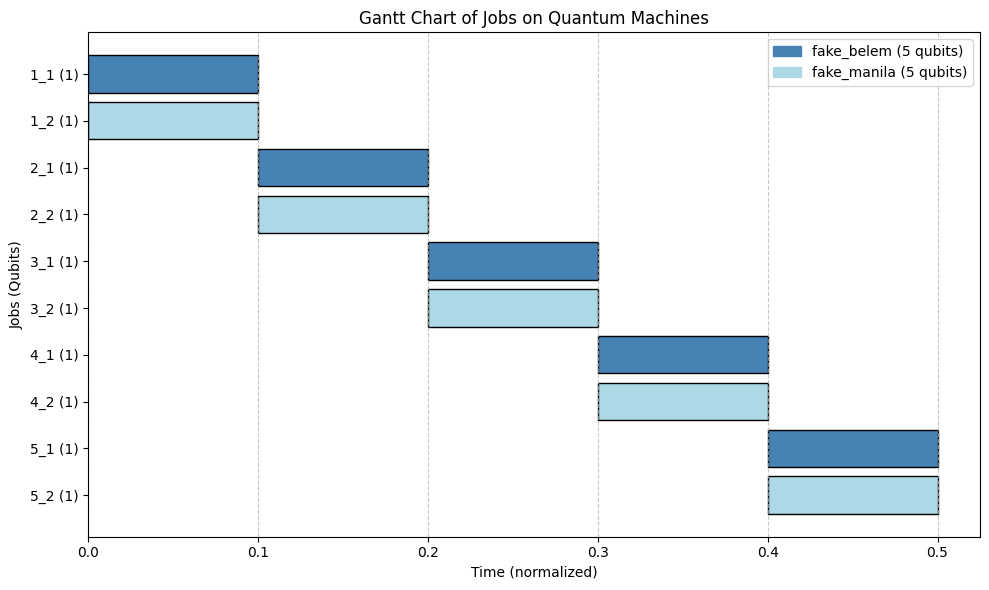

In [19]:
# Visualize data and update to dict
from component.d_scheduling.analyze import analyze_cal
from component.d_scheduling.datawork.visualize import visualize_data
from component.d_scheduling.datawork.updateToDict import update_scheduler_jobs
data = analyze_cal.load_job_data("component/d_scheduling/scheduleResult/ilp/NoTaDS/schedule.json")
visualize_data(data)

In [20]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
for job_id, job in scheduler_job.items():
    backend = machines.get(job.machine)
    if backend:
        # Perform transpilation
        job.circuit.data = [hasChange for hasChange in job.circuit.data if hasChange.operation.name != "qpd_1q"]
        job.transpiled_circuit = transpile(job.circuit, backend, scheduling_method='alap', layout_method='trivial')
        job.circuit.measure_all()
        job.transpiled_circuit_measured = transpile(job.circuit, backend, scheduling_method='alap', layout_method='trivial')
    else:
        print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")
        
    job.print()

Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_1
Circuit:          ░ ┌─┐
    q1: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0 
Qubits: 1
Machine: fake_belem
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit:                
     q1_0 -> 0 
               
ancilla_0 -> 1 
               
ancilla_1 -> 2 
               
ancilla_2 -> 3 
               
ancilla_3 -> 4 
               
Knitted Circuit: None
Transpiled Circuit Measured:                         ░          ┌─┐
     q1_0 -> 0 ─────────░──────────┤M├
               ┌──────────────────┐└╥┘
ancilla_0 -> 1 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_1 -> 2 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_2 -> 3 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_3 -> 4 ┤ Delay(24080[dt]) ├─╫─
               └──────────────────┘ ║ 
       meas: 1/═════════════════════╩═
           

In [22]:
# Define the jobs
jobs = data.copy()

# Generate unique execution times
def get_the_duration_from_transpiled_circuit(circuit):
    return circuit.duration

# Simulate the scheduling with parallel execution support
def simulate_scheduling(jobs):
    machine_schedules = {'fake_belem': [], 'fake_manila': []}  # Track active jobs for each machine
    jobs = sorted(jobs, key=lambda x: x['start'])  # Sort jobs by start time
    for job in jobs:
        machine = job['machine']
        # base_duration = job['duration']
        unique_duration = get_the_duration_from_transpiled_circuit(scheduler_job[job['job']].transpiled_circuit)

        # Find the earliest time the job can start
        current_schedule = machine_schedules[machine]
        start_time = job['start']
        
        # Check for parallel execution
        while True:
            # Filter out completed jobs
            active_jobs = [j for j in current_schedule if j['end'] > start_time]
            
            # Calculate total qubits in use
            total_qubits_in_use = sum(j['qubits'] for j in active_jobs)
            if total_qubits_in_use + job['qubits'] <= job['capacity']:
                # Enough resources are available
                break
            # Increment start_time to the earliest end time of active jobs
            start_time = min(j['end'] for j in active_jobs)

        # Update job start, end times, and duration
        job['start'] = start_time
        job['end'] = start_time + unique_duration
        job['duration'] = unique_duration

        # Add job to the machine's schedule
        current_schedule.append(job)

    return jobs

# Run the simulation
updated_jobs = simulate_scheduling(jobs)

# Print the updated schedule
# for job in updated_jobs:
#     print(job)

/tmp/ipykernel_129333/1978263994.py:6: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  return circuit.duration


In [23]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import qiskit.quantum_info as qi
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from component.f_assemble.assemble_work import fidelity_from_counts

aer_simulator = AerSimulator()
for job_name, job_info in scheduler_job.items():
    backend = machines.get(job_info.machine)
    
    if backend:
        transpiled_circuit = job_info.transpiled_circuit_measured
        
        # Run the ideal simulation
        ideal_result = aer_simulator.run(transpiled_circuit, shots=1024).result()
        ideal_counts = ideal_result.get_counts(transpiled_circuit)
        
        # Run circuit on the simulated backend
        job = SamplerV2(backend).run([transpiled_circuit], shots=1024)
        sim_result = job.result()[0]
        sim_counts = sim_result.data.meas.get_counts()
        
        # Calculate fidelity
        fidelity_val, rho_ideal, rho_sim = fidelity_from_counts(ideal_counts, sim_counts)
        
        # Store the fidelity values
        job_info.fidelity = fidelity_val
        
    job_info.print()

Job ID: e7ae9560-bd15-4cb1-bd69-c4c409f3aca4
Job Name: 1_1
Circuit:          ░ ┌─┐
    q1: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0 
Qubits: 1
Machine: fake_belem
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit:                
     q1_0 -> 0 
               
ancilla_0 -> 1 
               
ancilla_1 -> 2 
               
ancilla_2 -> 3 
               
ancilla_3 -> 4 
               
Knitted Circuit: None
Transpiled Circuit Measured:                         ░          ┌─┐
     q1_0 -> 0 ─────────░──────────┤M├
               ┌──────────────────┐└╥┘
ancilla_0 -> 1 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_1 -> 2 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_2 -> 3 ┤ Delay(24080[dt]) ├─╫─
               ├──────────────────┤ ║ 
ancilla_3 -> 4 ┤ Delay(24080[dt]) ├─╫─
               └──────────────────┘ ║ 
       meas: 1/═════════════════════╩═
           

In [24]:
utilization_permachine = analyze_cal.calculate_utilization(data)
print(utilization_permachine)

defaultdict(<class 'float'>, {'fake_belem': 0.0, 'fake_manila': 0.9975062344139651})


In [25]:
# Check if have children jobs in origin_job_info
for job_name, job_info in origin_job_info.items():
    if job_info.childrenJobs is not None:
        count_fidelity = 0
        for child_job in job_info.childrenJobs:
            #updata start time and end time from child job to parent job
            job_info.start_time = min(job_info.start_time, child_job.start_time)
            job_info.end_time = max(job_info.end_time, child_job.end_time)
            job_info.duration = job_info.end_time - job_info.start_time
            count_fidelity += child_job.fidelity * child_job.qubits
        job_info.fidelity = count_fidelity / job_info.qubits
    else:
        print(f"Job {job_name} has no children jobs.")

In [26]:
print(data)

[{'job': '1_1', 'qubits': 1, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 0.0, 'duration': 0}, {'job': '1_2', 'qubits': 1, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 160.0, 'duration': 160}, {'job': '2_1', 'qubits': 1, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.1, 'end': 0.1, 'duration': 0}, {'job': '2_2', 'qubits': 1, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.1, 'end': 160.1, 'duration': 160}, {'job': '3_1', 'qubits': 1, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.2, 'end': 0.2, 'duration': 0}, {'job': '3_2', 'qubits': 1, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.2, 'end': 160.2, 'duration': 160}, {'job': '4_1', 'qubits': 1, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.3, 'end': 0.3, 'duration': 0}, {'job': '4_2', 'qubits': 1, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.3, 'end': 160.3, 'duration': 160}, {'job': '5_1', 'qubits': 1, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.4, 'end': 0.4, 'dura

In [27]:
metrics = analyze_cal.calculate_metrics(data, utilization_permachine)
analyze_cal.print_metrics(metrics)

result_Schedule.average_turnaroundTime = metrics['average_turnaroundTime']
result_Schedule.average_responseTime = metrics['average_responseTime']
result_Schedule.makespan = metrics['makespan']
result_Schedule.average_utilization = metrics['average_utilization']
result_Schedule.average_throughput = metrics['throughput']

160.4
10
16.04


In [28]:
# Calculate all the values of components
sum_fidelity = 0
for job_name, job_info in origin_job_info.items():
    sum_fidelity += job_info.fidelity * job_info.qubits
average_fidelity = sum_fidelity / (result_Schedule.averageQubits * result_Schedule.numcircuit)
result_Schedule.average_fidelity = average_fidelity

In [29]:
import os
import json
from dataclasses import asdict

# Create the directory path
algorithm_folder_path = os.path.join("component", "finalResult","5_5", result_Schedule.nameSchedule, result_Schedule.nameAlgorithm)
os.makedirs(algorithm_folder_path, exist_ok=True)

# Construct the base file name
numcircuit = result_Schedule.numcircuit
numqubit = result_Schedule.averageQubits
base_filename = f"{numcircuit}_{numqubit}"

# Ensure the filename is unique
existing_files = os.listdir(algorithm_folder_path)
matching_files = [f for f in existing_files if f.startswith(base_filename) and f.endswith(".json")]

if not matching_files:
    final_filename = f"{base_filename}_0.json"
else:
    suffixes = [
        int(f.replace(base_filename, "").replace(".json", "").replace("_", ""))
        for f in matching_files
        if f.replace(base_filename, "").replace(".json", "").replace("_", "").isdigit()
    ]
    next_suffix = max(suffixes, default=0) + 1
    final_filename = f"{base_filename}_{next_suffix}.json"

# Define the output file path
output_file_path = os.path.join(algorithm_folder_path, final_filename)

# Save the result to the JSON file
with open(output_file_path, "w") as f:
    json.dump(asdict(result_Schedule), f, indent=4)

# Print the result
print(f"Result saved to {output_file_path}")

Result saved to component/finalResult/5_5/NoTaDS/ghz/5_2.0_1.json
